### This file plots the processed csv files with matplotlib

Note: manually select date and file name in the corresponding section (either cpu, netsend or netrecv)

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np
import pandas as pd

## Adjust date of processed csv files

In [3]:
date = '2018-11-04_00h57'
base_path = '/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/' + date + '/'
worker_list = [8,16,32,64]

In [4]:
def y_fmt(tick_val, pos):
    if tick_val > 1000000:
        val = int(tick_val)/1000000
        return str(val).rstrip('0') + ' M'
    elif tick_val >= 1000:
        val = int(tick_val) / 1000
        return str(val).rstrip('0') + ' k'
    else:
        return tick_val

## CPU utilization plot

In [5]:
# read data into pandas dataframe
file_name = 'dstat_mw_cpu_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,cpu_mean,cpu_std
0,6,8,7.274197,0.184345
1,6,16,7.444864,0.368176
2,6,32,7.714009,0.156515
3,6,64,8.762887,0.192966
4,24,8,16.240225,0.161287
5,24,16,21.485587,0.518507
6,24,32,23.463070,0.132869
7,24,64,24.432352,0.070558
8,48,8,16.929798,0.325592
9,48,16,23.061700,0.140336


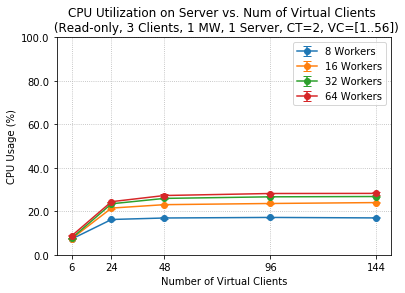

In [6]:
f = plt.figure()
plt.title("CPU Utilization on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['cpu_mean']
    std = df_c_cut['cpu_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("CPU Usage (%)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=100)
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network send activity plot

In [7]:
# read data into pandas dataframe
file_name = 'dstat_server_netsend_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netsend_mean,netsend_std
0,6,8,3.915769e+05,8226.700248
1,6,16,3.855855e+05,8544.594251
2,6,32,3.734173e+05,896.112713
3,6,64,3.769321e+05,2319.290072
4,24,8,8.809687e+05,57396.732347
5,24,16,8.753751e+05,57096.877638
6,24,32,8.900375e+05,21934.260040
7,24,64,9.038118e+05,7181.172315
8,48,8,9.279167e+05,24342.453824
9,48,16,1.028814e+06,14637.051930


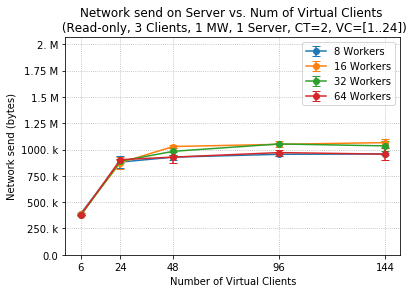

In [8]:
f = plt.figure()
plt.title("Network send on Server vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..24])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netsend_mean']
    std = df_c_cut['netsend_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network send (bytes)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netsend_mean']))
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)

## Network recv activity plot

In [9]:
# read data into pandas dataframe
file_name = 'dstat_mw_netrecv_ratio_1:0.csv'
df_c = pd.read_csv(base_path + file_name)
df_c

,client,worker,netrecv_mean,netrecv_std
0,6,8,1.244254e+07,2.588052e+05
1,6,16,1.225581e+07,2.736236e+05
2,6,32,1.186604e+07,2.721935e+04
3,6,64,1.197713e+07,7.331528e+04
4,24,8,2.805913e+07,1.829917e+06
5,24,16,2.788318e+07,1.822634e+06
6,24,32,2.835599e+07,6.976242e+05
7,24,64,2.878850e+07,2.301351e+05
8,48,8,2.955905e+07,7.735895e+05
9,48,16,3.277849e+07,4.665612e+05


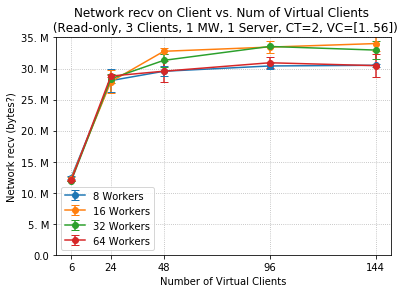

In [10]:
f = plt.figure()
plt.title("Network recv on Client vs. Num of Virtual Clients \n (Read-only, 3 Clients, 1 MW, 1 Server, CT=2, VC=[1..56])")

for worker in worker_list:
    # extract values of interest
    df_c_cut = df_c[(df_c.worker == worker)]
    
    vcs = df_c_cut['client']
    tps = df_c_cut['netrecv_mean']
    std = df_c_cut['netrecv_std']
    
    plt.errorbar(x = vcs, y = tps, yerr = std, label = "{} Workers".format(worker), capsize = 4, marker='o')

plt.grid(linestyle = "dotted")
plt.ylabel("Network recv (bytes?)")
plt.xlabel("Number of Virtual Clients")
plt.xticks([0] + np.array(vcs))
plt.ylim(bottom=0, top=1e6+np.max(df_c['netrecv_mean']))
plt.legend()


ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))

plt.show()
f.savefig("/Users/florianmorath/Desktop/ASL_project/scripts/2_BaselineWithMW/processed_data/one_mw/"+date+"/"+file_name[:-4]+".png", dpi = 150)